# Test Analyser

Read in the results data (from `data/results.csv` and analyse it. We use the [TAM](https://cran.r-project.org/web/packages/TAM/) package as it's capable of dealing with tests that have a mix of dichotomous and polytomous items. The goal here is to analyse a simulated test to ensure that it approximates a real world test.

We assume that the 1PL model is used.

$$
Pr(X=1) = \frac{exp(\theta-b)}{1 + exp(\theta-b)}
$$

We'll want to use the partial credit model (PCM) to analyse the data. Items are classed by the number of categories ($k$) that they contain; dichotomous items have a value of $k = 2, K = \{ 0, 1 \}$. The polytomous items have a varying number of categories.

## Data Ingest

For this analysis we need the `results.csv` file from the `data` folder.

In [1]:
library(tidyverse)
library(TAM)

dfRaw <- read_csv("data/results.csv")

dfTest <- dfRaw %>%
  dplyr::select(-systemname)

numItems <- ncol(dfTest)
numCandidates <- nrow(dfTest)

Rows: 400 Columns: 125

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): systemname
dbl (124): A1L_7616_01#6789, A1L_20679_02#6790, A1L_5480_03#6791, A2L_5483_0...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [2]:
# show a selection of data from the test...
head(dfRaw[c('systemname','A1L_7616_01#6789', 'A1L_20679_02#6790', 'A1L_5480_03#6791', 'S1', 'S2')])

systemname,A1L_7616_01#6789,A1L_20679_02#6790,A1L_5480_03#6791,S1,S2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DT0001,0,0,1,0,0
DT0002,0,0,0,0,0
DT0003,1,1,1,1,1
DT0004,1,1,1,1,1
DT0005,0,0,0,0,0
DT0006,1,1,0,1,1


## Summary Stats
We'll use the TAM package to get some summary info for the dataset. TAM will automatically run the PCM when our data is polytomous. We need to remove the systemname (candidate ID) column first.

In [22]:
dfTestResponses <- dfRaw[-c(1)]

In [23]:
pcm <- tam(dfTestResponses)

....................................................
Processing Data      2022-01-08 11:46:13 
    * Response Data: 400 Persons and  124 Items 
    * Numerical integration with 21 nodes
    * Created Design Matrices   ( 2022-01-08 11:46:13 )
    * Calculated Sufficient Statistics   ( 2022-01-08 11:46:13 )
....................................................
Iteration 1     2022-01-08 11:46:13
E Step
M Step Intercepts   |----
  Deviance = 35974.7989
  Maximum item intercept parameter change: 0.925747
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 3.853425
....................................................
Iteration 2     2022-01-08 11:46:13
E Step
M Step Intercepts   |---
  Deviance = 34451.5798 | Absolute change: 1523.219 | Relative change: 0.04421333
  Maximum item intercept parameter change: 0.21029
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter ch

....................................................
Iteration 22     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34385.3463 | Absolute change: 0.0833 | Relative change: 2.42e-06
  Maximum item intercept parameter change: 0.002896
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000949
....................................................
Iteration 23     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34385.2571 | Absolute change: 0.0892 | Relative change: 2.59e-06
  Maximum item intercept parameter change: 0.003001
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.00099
....................................................
Iteration 24     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34385.1613 | Absolute change: 0.0958 | Relative change: 2.79e-06
  Maximum item intercept parameter change: 0

....................................................
Iteration 44     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34379.5179 | Absolute change: 0.5898 | Relative change: 1.716e-05
  Maximum item intercept parameter change: 0.007745
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.002784
....................................................
Iteration 45     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34378.8854 | Absolute change: 0.6325 | Relative change: 1.84e-05
  Maximum item intercept parameter change: 0.007992
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.002866
....................................................
Iteration 46     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34378.2135 | Absolute change: 0.6719 | Relative change: 1.955e-05
  Maximum item intercept parameter change

....................................................
Iteration 66     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34365.8872 | Absolute change: 0.3743 | Relative change: 1.089e-05
  Maximum item intercept parameter change: 0.006069
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.00212
....................................................
Iteration 67     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34365.5353 | Absolute change: 0.3519 | Relative change: 1.024e-05
  Maximum item intercept parameter change: 0.005887
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.002052
....................................................
Iteration 68     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34365.2044 | Absolute change: 0.3308 | Relative change: 9.63e-06
  Maximum item intercept parameter change:

....................................................
Iteration 88     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34361.7647 | Absolute change: 0.0697 | Relative change: 2.03e-06
  Maximum item intercept parameter change: 0.002548
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000714
....................................................
Iteration 89     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34361.7016 | Absolute change: 0.0631 | Relative change: 1.84e-06
  Maximum item intercept parameter change: 0.002421
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.00067
....................................................
Iteration 90     2022-01-08 11:46:13
E Step
M Step Intercepts   |--
  Deviance = 34361.6445 | Absolute change: 0.0571 | Relative change: 1.66e-06
  Maximum item intercept parameter change: 0

....................................................
Iteration 110     2022-01-08 11:46:14
E Step
M Step Intercepts   |--
  Deviance = 34361.1996 | Absolute change: 0.0062 | Relative change: 1.8e-07
  Maximum item intercept parameter change: 0.000747
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000175
....................................................
Iteration 111     2022-01-08 11:46:14
E Step
M Step Intercepts   |--
  Deviance = 34361.1941 | Absolute change: 0.0056 | Relative change: 1.6e-07
  Maximum item intercept parameter change: 0.000704
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000165
....................................................
Iteration 112     2022-01-08 11:46:14
E Step
M Step Intercepts   |--
  Deviance = 34361.1891 | Absolute change: 0.0049 | Relative change: 1.4e-07
  Maximum item intercept parameter change: 

....................................................
Iteration 132     2022-01-08 11:46:14
E Step
M Step Intercepts   |--
  Deviance = 34361.1531 | Absolute change: 5e-04 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000204
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 4.5e-05
....................................................
Iteration 133     2022-01-08 11:46:14
E Step
M Step Intercepts   |--
  Deviance = 34361.1527 | Absolute change: 4e-04 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000192
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 4.3e-05
....................................................
Iteration 134     2022-01-08 11:46:14
E Step
M Step Intercepts   |--
  Deviance = 34361.1523 | Absolute change: 4e-04 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000181
  

In [24]:
summary(pcm)

------------------------------------------------------------
TAM 3.7-16 (2021-06-24 14:31:37) 
R version 4.1.0 (2021-05-18) aarch64, darwin20 | nodename=James-Page-MacBook-Pro.local | login=jamespage 

Date of Analysis: 2022-01-08 11:46:14 
Time difference of 0.587671 secs
Computation time: 0.587671 

Multidimensional Item Response Model in TAM 

IRT Model: 1PL
Call:
tam.mml(resp = resp)

------------------------------------------------------------
Number of iterations = 144 
Numeric integration with 21 integration points

Deviance = 34361.15 
Log likelihood = -17180.58 
Number of persons = 400 
Number of persons used = 400 
Number of items = 124 
Number of estimated parameters = 125 
    Item threshold parameters = 124 
    Item slope parameters = 0 
    Regression parameters = 0 
    Variance/covariance parameters = 1 

AIC = 34611  | penalty=250    | AIC=-2*LL + 2*p 
AIC3 = 34736  | penalty=375    | AIC3=-2*LL + 3*p 
BIC = 35110  | penalty=748.93    | BIC=-2*LL + log(n)*p 
aBIC = 34

## Item Difficulties
We can extract the item difficulties and use them to update the item bank if we wish.

In [25]:
dfItemUpdates <- pcm$item

In [26]:
head(dfItemUpdates[, c('item', 'N', 'M', 'xsi.item')])

,item,N,M,xsi.item
,<chr>,<dbl>,<dbl>,<dbl>
A1L_7616_01#6789,A1L_7616_01#6789,400,0.4150,0.5920839
A1L_20679_02#6790,A1L_20679_02#6790,400,0.3950,0.7795855
A1L_5480_03#6791,A1L_5480_03#6791,400,0.4275,0.4756974
A2L_5483_04#6792,A2L_5483_04#6792,400,0.3800,0.9214716
A2L_24442_05#6793,A2L_24442_05#6793,400,0.3550,1.1609187
A2L_7620_06#6794,A2L_7620_06#6794,400,0.4100,0.6387998


Here, `N` is the number of responses, `M` is the ratio of correct responses and `xsi.item` is the item difficulty (or $b$ parameter).

In [27]:
# read in items.csv and create a joined dataset using the new
# item difficulties calculated from the test response analysis
dfItems <- read_csv("data/items.csv") %>%
  select(-c(b, se)) %>%
  left_join(dfItemUpdates, by = c("UIID" = "item")) %>%
  select(c(UIID, a, b = xsi.item, rating, k))

# then write out to a new items file
write_csv(dfItems, 'data/updated-items.csv')

Rows: 124 Columns: 6

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UIID, rating
dbl (4): a, b, se, k


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



## Item Fit
We can calulcate the infit and outfit statistics. For polytomous items, the statistics are produced for each level.

In [28]:
Fit.poly <- tam.fit(pcm)

Item fit calculation based on 40 simulations
|**********|
|----------|


In [30]:
head(Fit.poly$itemfit)

,parameter,Outfit,Outfit_t,Outfit_p,Outfit_pholm,Infit,Infit_t,Infit_p,Infit_pholm
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1L_7616_01#6789,0.8283462,-2.2396221,0.02511547,1,0.9940598,-0.04505896,0.9640603,1
2,A1L_20679_02#6790,0.8865046,-1.4452748,0.14838070,1,0.9958342,-0.02355855,0.9812047,1
3,A1L_5480_03#6791,0.8380593,-2.1412230,0.03225606,1,0.9669222,-0.37818440,0.7052936,1
4,A2L_5483_04#6792,0.8632168,-1.7249999,0.08452748,1,0.9928431,-0.05873941,0.9531597,1
5,A2L_24442_05#6793,1.1234774,0.8786214,0.37960656,1,0.8718343,-1.55396397,0.1201930,1
6,A2L_7620_06#6794,0.9234173,-0.9599080,0.33710151,1,1.0407227,0.51115936,0.6092395,1


## Item Information Functions
If we're interested we can get Item Characteristic Curves (ICCs) and Item Information Functions (IIFs) for the polytomous item thresholds. Here we'll show the ICCs and IIFs for items S1 (item 113) and W1 (item 123).

In [35]:
r1 <- dfItems[,5]

(r1)

k
<dbl>
1
1
1
1
1
1
1
1
1


Iteration in WLE/MLE estimation  1   | Maximal change  1.6274 
Iteration in WLE/MLE estimation  2   | Maximal change  0.6518 
Iteration in WLE/MLE estimation  3   | Maximal change  0.3044 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0504 
Iteration in WLE/MLE estimation  5   | Maximal change  5e-04 
Iteration in WLE/MLE estimation  6   | Maximal change  0 
----
 WLE Reliability= 0.954 


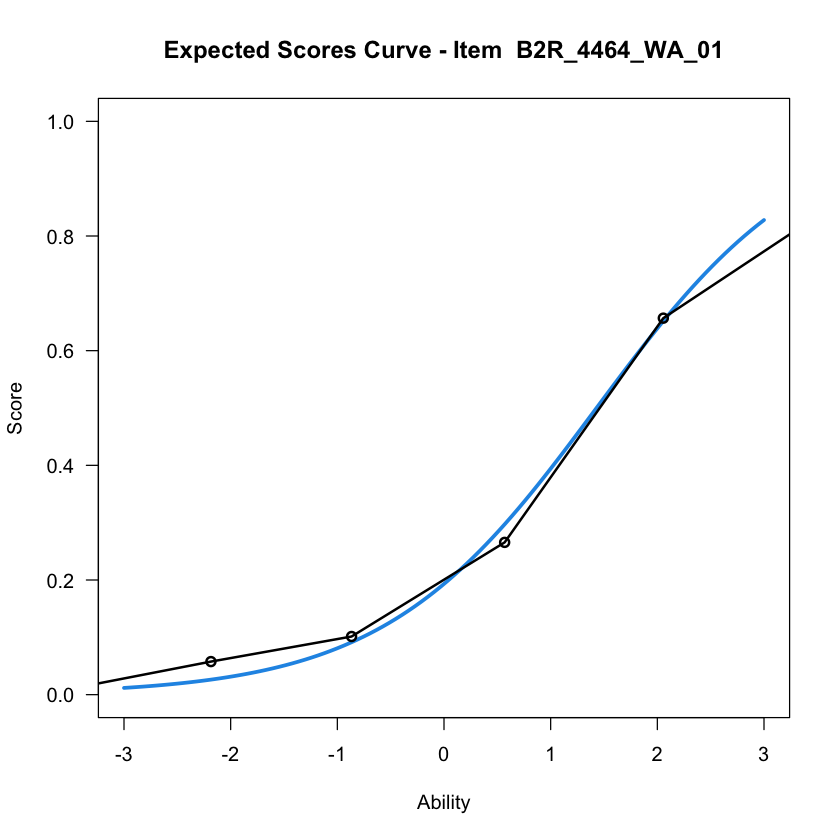

In [11]:
plot(pcm, items=113, type='expected', export=FALSE)

Iteration in WLE/MLE estimation  1   | Maximal change  1.6274 
Iteration in WLE/MLE estimation  2   | Maximal change  0.6518 
Iteration in WLE/MLE estimation  3   | Maximal change  0.3044 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0504 
Iteration in WLE/MLE estimation  5   | Maximal change  5e-04 
Iteration in WLE/MLE estimation  6   | Maximal change  0 
----
 WLE Reliability= 0.954 


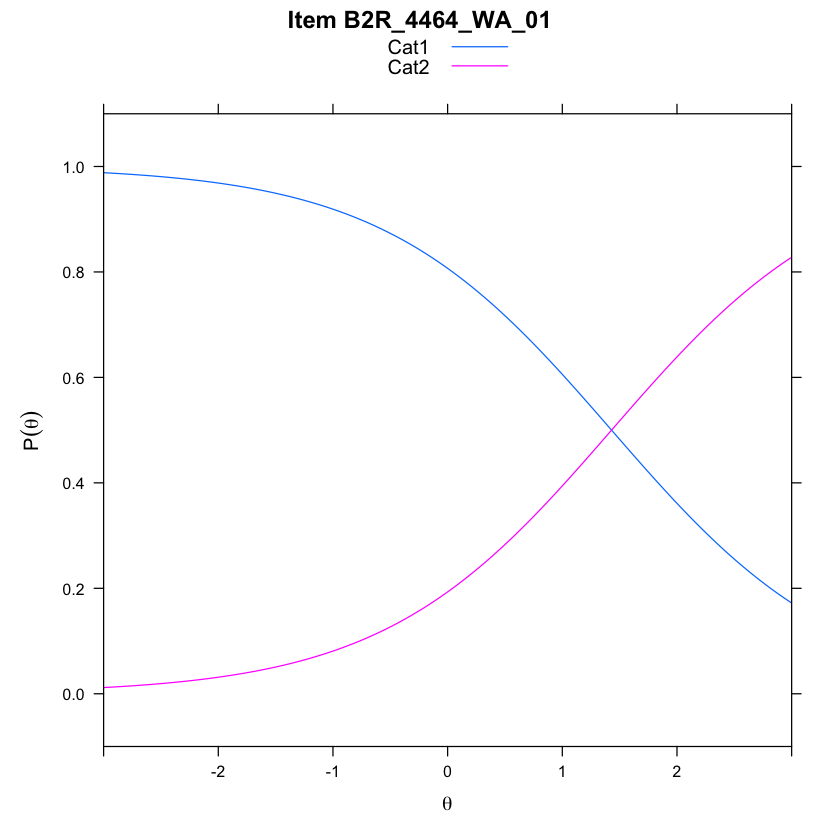

In [12]:
plot(pcm, items=113, type='items', export=FALSE)

Iteration in WLE/MLE estimation  1   | Maximal change  1.6274 
Iteration in WLE/MLE estimation  2   | Maximal change  0.6518 
Iteration in WLE/MLE estimation  3   | Maximal change  0.3044 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0504 
Iteration in WLE/MLE estimation  5   | Maximal change  5e-04 
Iteration in WLE/MLE estimation  6   | Maximal change  0 
----
 WLE Reliability= 0.954 


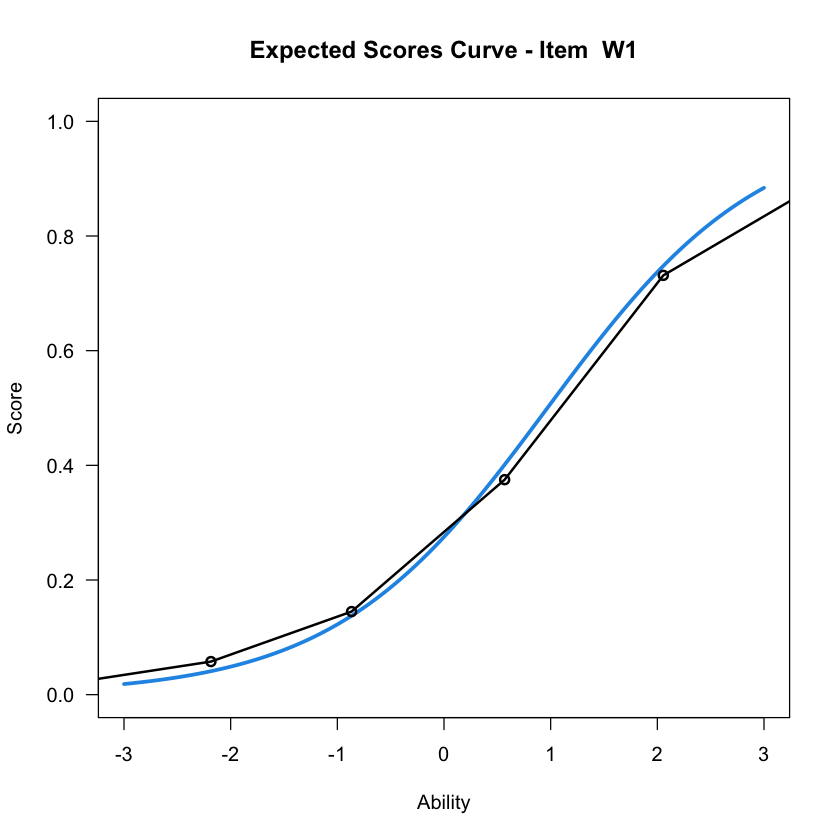

In [13]:
plot(pcm, items=123, type='expected', export=FALSE)

Iteration in WLE/MLE estimation  1   | Maximal change  1.6274 
Iteration in WLE/MLE estimation  2   | Maximal change  0.6518 
Iteration in WLE/MLE estimation  3   | Maximal change  0.3044 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0504 
Iteration in WLE/MLE estimation  5   | Maximal change  5e-04 
Iteration in WLE/MLE estimation  6   | Maximal change  0 
----
 WLE Reliability= 0.954 


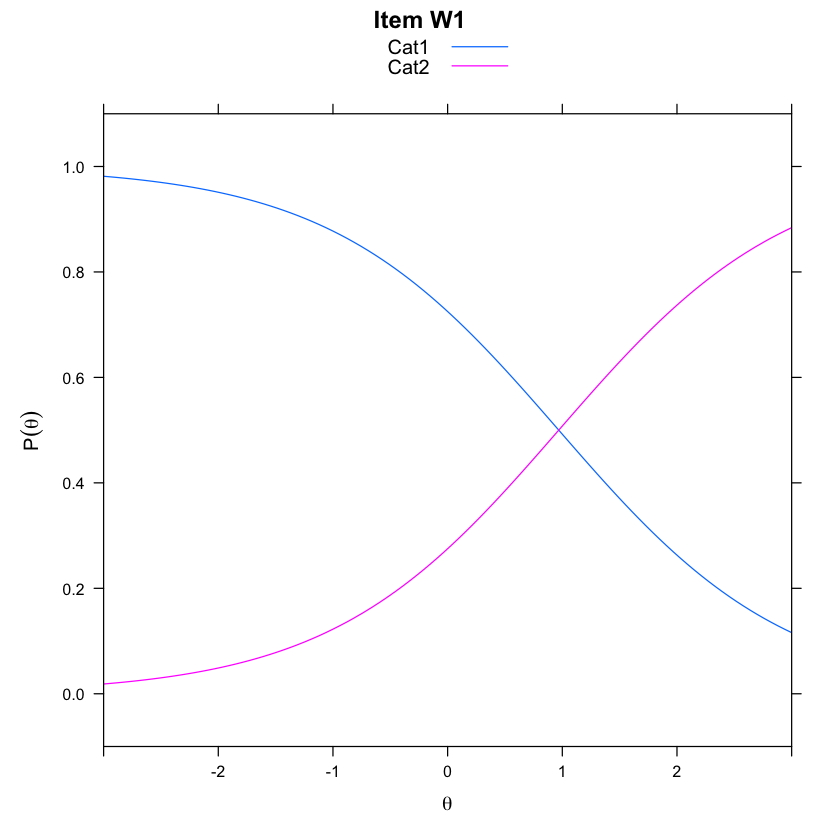

In [14]:
plot(pcm, items=123, type='items', export=FALSE)